# Colab setup

In [ ]:
import sys
if 'google.colab' in str(get_ipython()):
    ! {sys.executable} -m pip install pytorch-lifestream -q

In [1]:
!pip install pytorch-lightning==1.8.5 -q

## Setup

In [2]:
%load_ext autoreload
%autoreload 2

# import logging
import torch
import pytorch_lightning as pl
# import warnings

# warnings.filterwarnings('ignore')
# logging.getLogger("pytorch_lightning").setLevel(logging.ERROR)

## Data load

In [ ]:
# import os

# if not os.path.exists('data/transactions_train.csv'):
#     ! mkdir -p data
#     ! curl -OL https://storage.yandexcloud.net/ptls-datasets/age-prediction-nti-sbebank-2019.zip
#     ! unzip -j -o age-prediction-nti-sbebank-2019.zip 'data/*.csv' -d data
#     ! mv age-prediction-nti-sbebank-2019.zip data/

In [3]:
import pandas as pd

df_trx = pd.read_csv('/content/blockchain_data.csv', header=None)
df_trx.rename(columns={0: "dt", 1: "from", 2: "to", 3: "amount", 4: "abuser"}, inplace=True)

In [88]:
df_trx.head()

,dt,from,to,amount,abuser
0,1512557355,0xbf87b66d590cd9e39ebfe6895ae4cc7aa50f249f,0x004537fcd9095489ebe38180a382341b962b501d,50000000000000000,0
1,1513335342,0xbf87b66d590cd9e39ebfe6895ae4cc7aa50f249f,0x004537fcd9095489ebe38180a382341b962b501d,524293750000000000,0
2,1514567762,0x004537fcd9095489ebe38180a382341b962b501d,0xe41d2489571d322189246dafa5ebde1f4699f498,0,0
3,1514570003,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,0x004537fcd9095489ebe38180a382341b962b501d,893629360000000000,0
4,1514570293,0x004537fcd9095489ebe38180a382341b962b501d,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,1418000000000000000,0


In [89]:
df_trx['abuser'].value_counts()

0    48949
1    28230
Name: abuser, dtype: int64

In [90]:
df_trx[df_trx['from']=='0x58fcc7f3ce1b8d5394560f949b9cedf625f3f68f']

,dt,from,to,amount,abuser
50549,1611908754,0x58fcc7f3ce1b8d5394560f949b9cedf625f3f68f,0x05e954d559d02ddf0c94639163aca39e1bcb2b96,1000000000000000000,1
76029,1611908611,0x58fcc7f3ce1b8d5394560f949b9cedf625f3f68f,0x881d40237659c251811cec9c364ef91dc08d300c,250000000000000000,1
76030,1611908692,0x58fcc7f3ce1b8d5394560f949b9cedf625f3f68f,0x6b175474e89094c44da98b954eedeac495271d0f,0,1
76031,1611908692,0x58fcc7f3ce1b8d5394560f949b9cedf625f3f68f,0x881d40237659c251811cec9c364ef91dc08d300c,0,1
76032,1611908754,0x58fcc7f3ce1b8d5394560f949b9cedf625f3f68f,0x05e954d559d02ddf0c94639163aca39e1bcb2b96,1000000000000000000,1
76033,1622961023,0x58fcc7f3ce1b8d5394560f949b9cedf625f3f68f,0x76436d97c2ff7ce62f4a2557b670f94b14bbfba8,21353399922752240,1
76035,1634862130,0x58fcc7f3ce1b8d5394560f949b9cedf625f3f68f,0x4dbd4fc535ac27206064b68ffcf827b0a60bab3f,1500000000000000000,1
76036,1634865463,0x58fcc7f3ce1b8d5394560f949b9cedf625f3f68f,0xf747af214c702b542e0c18d89ba26930282885b2,740000000000000000,1
76037,1634865703,0x58fcc7f3ce1b8d5394560f949b9cedf625f3f68f,0x99c9fc46f92e8a1c0dec1b1747d010903e884be1,720000000000000000,1


In [ ]:
# import numpy as np
# import pandas as pd

# N_USERS = 200
# SEQ_LEN = 20

# df_trx = pd.DataFrame({
#     'user_id': np.repeat(np.arange(N_USERS), SEQ_LEN),
#     'dt': np.datetime64('2016-01-01 00:00:00') +
#     (np.random.rand(N_USERS * SEQ_LEN) * 365 * 24 * 60 * 60).astype('timedelta64'),
#     'mcc_code': (np.random.randint(10, 99, N_USERS * SEQ_LEN) * 100).astype(str),
#     'amount': np.exp(np.random.randn(N_USERS * SEQ_LEN) + np.log(5000)).round(2),
#     #'sibyl': (np.random.choice([0,1], N_USERS * SEQ_LEN))
# })

# df_trx.head(6)

In [7]:
df_abuse_to = df_trx[['to', 'abuser']].drop_duplicates()
len(df_abuse_to[df_abuse_to['abuser']==1])

6863

In [8]:
df_target = df_trx[['from', 'abuser']].drop_duplicates()
#df_target['abuser'] = np.random.choice([0,1], N_USERS)
df_target.head()

,from,abuser
0,0xbf87b66d590cd9e39ebfe6895ae4cc7aa50f249f,0
2,0x004537fcd9095489ebe38180a382341b962b501d,0
3,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,0
8,0x564286362092d8e7936f0549571a803b203aaced,0
9,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,0


In [17]:
test = df_target.groupby("from").count()

In [18]:
test.head()

,abuser
from,
0x00000000005dbcb0d0513fcda746382fe8a53468,1
0x00000000009a41862f3b2b0c688b7c0d1940511e,1
0x0000000000e52081b4531278fcd274e5f3cd86b5,1
0x000000000a38444e0a6e37d3b630d7e855a7cb13,1
0x000000000ecef000e9d22b7e0eb78ef2a8e698d5,1


In [92]:
df_target['abuser'].value_counts()

0    10179
1     5779
Name: abuser, dtype: int64

In [105]:
len(df_target[df_target['abuser']==1])

5779

In [108]:
df_uniq=df_trx[df_trx['abuser']==1]['from']
df_uniq.append(df_trx[df_trx['abuser']==1]['to'])

<ipython-input-108-b1275143bdb8>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_uniq.append(df_trx[df_trx['abuser']==1]['to'])


28230

In [110]:
len(df_uniq.drop_duplicates())

5779

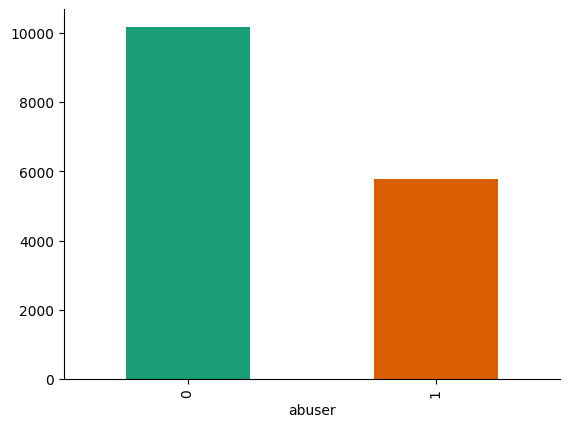

In [111]:
from matplotlib import pyplot as plt
import seaborn as sns
df_target.groupby('abuser').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

##EDA

In [95]:
col = "from"
df_trx.groupby(col, as_index=False)\
    .agg({'to': 'count'})\
    .sort_values('to', ascending=False)\
    .head(5)

,from,to
13761,0xc098b2a3aa256d2140208c3de6543aaef5cd3a94,1142
6602,0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0,364
10176,0x56eddb7aa87536c09ccc2793473599fd21a8b17f,335
3700,0x15aa5fa5d6fd14110225afc3beb4d8f259621866,330
12426,0x9696f59e4d72e237be84ffd425dcad154bf96976,299


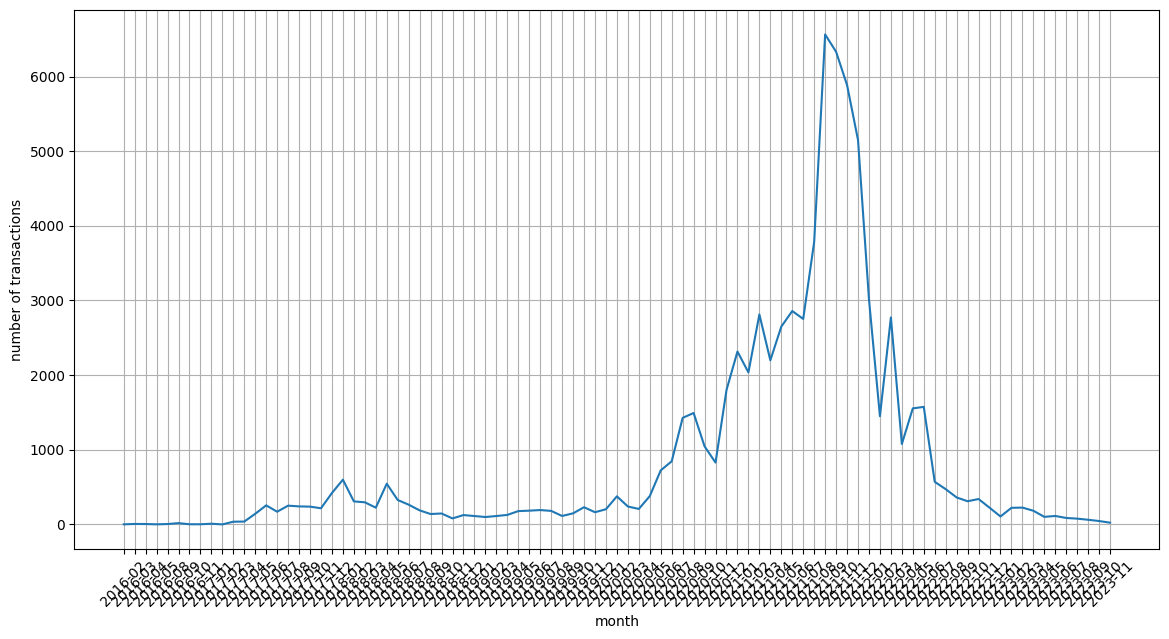

In [100]:
import datetime
import matplotlib.pyplot as plt

#df_trx["dt"] = df_trx["dt"].apply(lambda x: datetime.datetime.fromtimestamp(int(x)))

df_trx["blockTime_"] = df_trx["dt"]
df_trx['ym'] = df_trx['dt'].dt.strftime("%Y-%m")
df_time = df_trx.groupby('ym', as_index=False).agg({'to': 'count'}).sort_values('ym')

fig, ax = plt.subplots(figsize=(14,7))
ax.plot(df_time['ym'].iloc[:-1], df_time['to'].iloc[:-1])
plt.xticks(rotation=45)
plt.xlabel('month')
plt.ylabel('number of transactions')
plt.grid()
plt.show()

## Data preproccessing

In [102]:
from sklearn.model_selection import train_test_split

df_target_train, df_target_test = train_test_split(
    df_target, test_size=2000, stratify=df_target['abuser'], random_state=142)
df_target_train, df_target_valid = train_test_split(
    df_target_train, test_size=3000, stratify=df_target_train['abuser'], random_state=142)
print('Split {} records to train: {}, valid: {}, test: {}'.format(
    *[len(df) for df in [df_target, df_target_train, df_target_valid, df_target_test]]))

Split 15958 records to train: 10958, valid: 3000, test: 2000


In [129]:
#df_trx.drop(['abuser', 'blockTime_', 'ym'], axis=1, inplace=True)
#df_trx.drop(['blockTime_', 'ym'], axis=1, inplace=True)
df_trx.drop(['dt'], axis=1, inplace=True)
df_trx.head()

,from,to,amount,date
0,0xbf87b66d590cd9e39ebfe6895ae4cc7aa50f249f,0x004537fcd9095489ebe38180a382341b962b501d,50000000000000000,1512557355
1,0xbf87b66d590cd9e39ebfe6895ae4cc7aa50f249f,0x004537fcd9095489ebe38180a382341b962b501d,524293750000000000,1513335342
2,0x004537fcd9095489ebe38180a382341b962b501d,0xe41d2489571d322189246dafa5ebde1f4699f498,0,1514567762
3,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,0x004537fcd9095489ebe38180a382341b962b501d,893629360000000000,1514570003
4,0x004537fcd9095489ebe38180a382341b962b501d,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,1418000000000000000,1514570293


In [123]:
df_trx["date"] = df_trx["dt"].apply(lambda x: int(round(x.timestamp())))
df_trx.head()

,dt,from,to,amount,blockTime_,ym,date
0,2017-12-06 10:49:15,0xbf87b66d590cd9e39ebfe6895ae4cc7aa50f249f,0x004537fcd9095489ebe38180a382341b962b501d,50000000000000000,2017-12-06 10:49:15,2017-12,1512557355
1,2017-12-15 10:55:42,0xbf87b66d590cd9e39ebfe6895ae4cc7aa50f249f,0x004537fcd9095489ebe38180a382341b962b501d,524293750000000000,2017-12-15 10:55:42,2017-12,1513335342
2,2017-12-29 17:16:02,0x004537fcd9095489ebe38180a382341b962b501d,0xe41d2489571d322189246dafa5ebde1f4699f498,0,2017-12-29 17:16:02,2017-12,1514567762
3,2017-12-29 17:53:23,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,0x004537fcd9095489ebe38180a382341b962b501d,893629360000000000,2017-12-29 17:53:23,2017-12,1514570003
4,2017-12-29 17:58:13,0x004537fcd9095489ebe38180a382341b962b501d,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,1418000000000000000,2017-12-29 17:58:13,2017-12,1514570293


In [147]:
import pandas as pd

df_trx_train = pd.merge(df_trx, df_target_train['from'], on='from', how='inner')
df_trx_valid = pd.merge(df_trx, df_target_valid['from'], on='from', how='inner')
df_trx_test = pd.merge(df_trx, df_target_test['from'], on='from', how='inner')
print('Split {} transactions to train: {}, valid: {}, test: {}'.format(
    *[len(df) for df in [df_trx, df_trx_train, df_trx_valid, df_trx_test]]))

Split 77179 transactions to train: 57445, valid: 15147, test: 12401


In [148]:
df_trx_train.head()

,from,to,amount,date
0,0xbf87b66d590cd9e39ebfe6895ae4cc7aa50f249f,0x004537fcd9095489ebe38180a382341b962b501d,5.000000e+09,1512557355
1,0xbf87b66d590cd9e39ebfe6895ae4cc7aa50f249f,0x004537fcd9095489ebe38180a382341b962b501d,5.242937e+10,1513335342
2,0xbf87b66d590cd9e39ebfe6895ae4cc7aa50f249f,0x004537fcd9095489ebe38180a382341b962b501d,5.000000e+09,1512557355
3,0xbf87b66d590cd9e39ebfe6895ae4cc7aa50f249f,0x004537fcd9095489ebe38180a382341b962b501d,5.242937e+10,1513335342
4,0xbf87b66d590cd9e39ebfe6895ae4cc7aa50f249f,0x214e4dd04afdd148984ef3cb7b4e4959ebeb1f48,1.000000e+10,1512140169


In [145]:
df_trx["amount"] = df_trx["amount"].apply(lambda x: (int(x)/10e6)).astype('float32')
df_trx["from"] = df_trx["from"].astype('str')
df_trx["to"] = df_trx["to"].astype('str')
df_trx.dtypes

from       object
to         object
amount    float32
date        int64
dtype: object

In [149]:
%%time

from ptls.preprocessing import PandasDataPreprocessor

preprocessor = PandasDataPreprocessor(
    col_id='from',
    col_event_time='date',
    event_time_transformation='none', #'dt_to_timestamp'
    cols_category=['to'],
    cols_numerical=['amount'],
    # return_records=True,
)

#dataset = preprocessor.fit_transform(df_trx)

CPU times: user 57 µs, sys: 10 µs, total: 67 µs
Wall time: 69.1 µs


In [150]:
%%time
df_data_train = preprocessor.fit_transform(df_trx_train)
df_data_valid = preprocessor.transform(df_trx_valid)
df_data_test = preprocessor.transform(df_trx_test)

CPU times: user 11 s, sys: 51.3 ms, total: 11 s
Wall time: 12.1 s


In [151]:
df_data_train[:2]

[{'from': '0x00000000009a41862f3b2b0c688b7c0d1940511e',
  'date': tensor([1606642947, 1606767013, 1606767013, 1606767013, 1606767013, 1606767119,
          1606767155, 1606767170, 1606767203]),
  'event_time': tensor([1606642947, 1606767013, 1606767013, 1606767013, 1606767013, 1606767119,
          1606767155, 1606767170, 1606767203]),
  'to': tensor([  52,   11,    2, 7818,    7,    7,    1,    1,    1]),
  'amount': tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.])},
 {'from': '0x0000000000e52081b4531278fcd274e5f3cd86b5',
  'date': tensor([1635218515, 1635218874, 1635220502, 1635249423, 1635261855, 1635264431,
          1636430840, 1636430894]),
  'event_time': tensor([1635218515, 1635218874, 1635220502, 1635249423, 1635261855, 1635264431,
          1636430840, 1636430894]),
  'to': tensor([   5,   42,    2,   42, 1082, 9767,    2,   30]),
  'amount': tensor([0.0000e+00, 2.7000e+12, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00])}]

In [152]:
print('Record in dataset, train {}, valid {}, test {}\nEach record is a client with list of transactions'.format(
    *[len(df) for df in [df_data_train, df_data_valid, df_data_test]]))

Record in dataset, train 10886, valid 2997, test 1997
Each record is a client with list of transactions


In [97]:
import pandas as pd

df_data_train = pd.DataFrame(df_data_train)
df_data_train.head()

,from,date,event_time,to,amount
0,0x00000000009a41862f3b2b0c688b7c0d1940511e,"[tensor(1606642947), tensor(1606767013), tenso...","[tensor(1606642947), tensor(1606767013), tenso...","[tensor(52), tensor(11), tensor(2), tensor(781...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
1,0x0000000000e52081b4531278fcd274e5f3cd86b5,"[tensor(1635218515), tensor(1635218874), tenso...","[tensor(1635218515), tensor(1635218874), tenso...","[tensor(5), tensor(42), tensor(2), tensor(42),...","[tensor(0.), tensor(2.7000e+12), tensor(0.), t..."
2,0x00000000c222f1336b0167f60543996ddeeec492,"[tensor(1625956248), tensor(1625956248), tenso...","[tensor(1625956248), tensor(1625956248), tenso...","[tensor(369), tensor(369), tensor(369), tensor...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
3,0x00000000cc0b822819f03424dacf9077fdaa58a3,"[tensor(1632124580), tensor(1632124711), tenso...","[tensor(1632124580), tensor(1632124711), tenso...","[tensor(447), tensor(1087), tensor(447), tenso...","[tensor(8.7437e+10), tensor(0.), tensor(5.7514..."
4,0x00000000e2d6bbc97779bbd38463fe25eb7e6983,"[tensor(1665299807), tensor(1665328691), tenso...","[tensor(1665299807), tensor(1665328691), tenso...","[tensor(3668), tensor(3668), tensor(3668)]","[tensor(2.0000e+09), tensor(3.9587e+08), tenso..."


In [94]:
df_data_valid = pd.DataFrame(df_data_valid)
df_data_test = pd.DataFrame(df_data_test)

In [95]:
df_data_train = pd.merge(df_data_train, df_target, on='from')
df_data_valid = pd.merge(df_data_valid, df_target, on='from')
df_data_test = pd.merge(df_data_test, df_target, on='from')
df_data_test.head()

,from,date,event_time,to,amount,abuser
0,0x00000000005dbcb0d0513fcda746382fe8a53468,"[tensor(1587673310), tensor(1587673310), tenso...","[tensor(1587673310), tensor(1587673310), tenso...","[tensor(11., dtype=torch.float64), tensor(1467...","[tensor(0.), tensor(0.), tensor(4.0000e+09), t...",0
1,0x000000000a38444e0a6e37d3b630d7e855a7cb13,"[tensor(1614487145), tensor(1616030317), tenso...","[tensor(1614487145), tensor(1616030317), tenso...","[tensor(23., dtype=torch.float64), tensor(79.,...","[tensor(0.), tensor(1.0000e+09), tensor(1.0000...",0
2,0x000000000ecef000e9d22b7e0eb78ef2a8e698d5,"[tensor(1645405010), tensor(1645405129), tenso...","[tensor(1645405010), tensor(1645405129), tenso...","[tensor(147., dtype=torch.float64), tensor(19....","[tensor(0.), tensor(0.), tensor(1.3637e+11), t...",0
3,0x0001cf2b6528d6ebab8a8869fb8786c1398c5015,"[tensor(1635902993), tensor(1638883854), tenso...","[tensor(1635902993), tensor(1638883854), tenso...","[tensor(15., dtype=torch.float64), tensor(2., ...","[tensor(1.0380e+10), tensor(0.), tensor(1.1000...",0
4,0x000a0b24b1476f647a2a2fa4474f9ed32c685a8e,"[tensor(1543095700), tensor(1543095882), tenso...","[tensor(1543095700), tensor(1543095882), tenso...","[tensor(63., dtype=torch.float64), tensor(5., ...","[tensor(9.9000e+11), tensor(0.), tensor(0.), t...",0


In [99]:
df_data_train['abuser'].value_counts()

0    7024
1    3998
Name: abuser, dtype: int64

In [102]:
df_data_train = df_data_train.to_dict(orient='records')
df_data_valid = df_data_valid.to_dict(orient='records')
df_data_test = df_data_test.to_dict(orient='records')

In [109]:
df_data_test[1200]

{'from': '0x4ba15b8a595fa56abe204bda65ba0ef585ef5261',
 'date': tensor([1628400085, 1628400181, 1628400181, 1628400235, 1628400288, 1628400288,
         1628400363, 1628400363, 1628400675, 1628400675, 1628400702, 1628400702,
         1628400855, 1628401212, 1628401574, 1628401574, 1628401601, 1628401618,
         1628401933, 1628402313, 1628402478]),
 'event_time': tensor([1628400085, 1628400181, 1628400181, 1628400235, 1628400288, 1628400288,
         1628400363, 1628400363, 1628400675, 1628400675, 1628400702, 1628400702,
         1628400855, 1628401212, 1628401574, 1628401574, 1628401601, 1628401618,
         1628401933, 1628402313, 1628402478]),
 'to': tensor([3.0000e+00, 1.4679e+04, 1.4679e+04, 9.1360e+03, 4.4720e+03, 4.4720e+03,
         1.4679e+04, 1.4679e+04, 5.0870e+03, 5.0870e+03, 4.4540e+03, 4.4540e+03,
         5.0960e+03, 5.0800e+03, 4.9570e+03, 5.0850e+03, 5.0810e+03, 5.0910e+03,
         5.0280e+03, 8.1380e+03, 5.0990e+03], dtype=torch.float64),
 'amount': tensor([3.4000e

In [104]:
train = np.array(df_data_train)
valid = np.array(df_data_valid)
test = np.array(df_data_test)

In [105]:
np.save('train', train)
np.save('valid', valid)
np.save('test', test)

In [3]:
import numpy as np

train = np.load('/content/train.npy', allow_pickle=True)
valid = np.load('/content/valid.npy', allow_pickle=True)
test = np.load('/content/test.npy', allow_pickle=True)

df_data_train = train.tolist()
df_data_valid = valid.tolist()
df_data_test = test.tolist()

In [4]:
df_data_test[1200]

{'from': '0x4ba15b8a595fa56abe204bda65ba0ef585ef5261',
 'date': tensor([1628400085, 1628400181, 1628400181, 1628400235, 1628400288, 1628400288,
         1628400363, 1628400363, 1628400675, 1628400675, 1628400702, 1628400702,
         1628400855, 1628401212, 1628401574, 1628401574, 1628401601, 1628401618,
         1628401933, 1628402313, 1628402478]),
 'event_time': tensor([1628400085, 1628400181, 1628400181, 1628400235, 1628400288, 1628400288,
         1628400363, 1628400363, 1628400675, 1628400675, 1628400702, 1628400702,
         1628400855, 1628401212, 1628401574, 1628401574, 1628401601, 1628401618,
         1628401933, 1628402313, 1628402478]),
 'to': tensor([3.0000e+00, 1.4679e+04, 1.4679e+04, 9.1360e+03, 4.4720e+03, 4.4720e+03,
         1.4679e+04, 1.4679e+04, 5.0870e+03, 5.0870e+03, 4.4540e+03, 4.4540e+03,
         5.0960e+03, 5.0800e+03, 4.9570e+03, 5.0850e+03, 5.0810e+03, 5.0910e+03,
         5.0280e+03, 8.1380e+03, 5.0990e+03], dtype=torch.float64),
 'amount': tensor([3.4000e

## embeder

In [6]:
import torch
import torchmetrics
from ptls.nn import TrxEncoder, RnnSeqEncoder, Head

In [ ]:
preprocessor.get_category_dictionary_sizes()

In [ ]:
import pickle

with open('preprocessor.p', 'wb') as f:
    pickle.dump(preprocessor, f)

In [ ]:
dataset = sorted(dataset, key=lambda x: x['client_id'])

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset, test_size=0.2, random_state=42)

len(train), len(test)

(24000, 6000)

In [ ]:
train[0].keys()

dict_keys(['client_id', 'trans_date', 'small_group', 'amount_rur', 'event_time'])

## Embedding training

Model training in our framework organised via pytorch-lightning (pl) framework.
The key parts of neural networks training in pl are:

    * model (`pytorch_lightning.LightningModule`)
    * data loader (`torch.utils.data.DataLoader`)
    * trainer (`pytorch_lightning.Trainer`)
    
For futher details check https://pytorchlightning.ai/

### Model definition

In [173]:
preprocessor.get_category_dictionary_sizes()

{'to': 14680}

In [68]:
from functools import partial
import torchmetrics
from ptls.nn import TrxEncoder, RnnSeqEncoder, Head
from ptls.frames.supervised import SequenceToTarget

# trx_encoder_params = dict(
#     embeddings_noise=0.003,
#     numeric_values={'amount': 'identity'},
#     embeddings={
#         'date': {'in': 50000, 'out': 16},
#     },
# )

# seq_encoder = RnnSeqEncoder(
#     trx_encoder=TrxEncoder(**trx_encoder_params),
#     hidden_size=256,
#     type='gru',
# )

seq_encoder = RnnSeqEncoder(
    trx_encoder=TrxEncoder(
        embeddings={
            'date': {'in': 50000, 'out': 32},
        },
        numeric_values={
            'amount': 'log',
        },
        embeddings_noise=0.001,
    ),
    hidden_size=48,
)

# classification - linear output with sigmoid or logsoftmax (num_classes > 1)
# regression - pure linear output
# softplus - linear output with softplus

sup_module = SequenceToTarget(
    seq_encoder=seq_encoder,
    head=Head(input_size=seq_encoder.embedding_size, objective='classification'),
    loss=torch.nn.NLLLoss(),
    metric_list=torchmetrics.Accuracy(task='binary'),
    # optimizer_partial=partial(torch.optim.Adam, lr=0.001),
    # lr_scheduler_partial=partial(torch.optim.lr_scheduler.ReduceLROnPlateau, mode='min', factor=0.5, patience=2)
    optimizer_partial=partial(torch.optim.Adam),
    lr_scheduler_partial=partial(torch.optim.lr_scheduler.StepLR, step_size=4, gamma=0.5),
)

In [69]:
sup_module

SequenceToTarget(
  (seq_encoder): RnnSeqEncoder(
    (trx_encoder): TrxEncoder(
      (embeddings): ModuleDict(
        (date): NoisyEmbedding(
          50000, 32, padding_idx=0
          (dropout): Dropout(p=0, inplace=False)
        )
      )
      (numeric_values): ModuleDict(
        (amount): LogScaler()
      )
      (numerical_batch_norm): RBatchNorm(
        (bn): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (seq_encoder): RnnEncoder(
      (rnn): GRU(33, 48, batch_first=True)
      (reducer): LastStepEncoder()
    )
  )
  (head): Head(
    (model): Sequential(
      (0): Sequential(
        (0): Linear(in_features=48, out_features=1, bias=True)
        (1): Sigmoid()
        (2): Flatten(start_dim=0, end_dim=-1)
      )
    )
  )
  (loss): NLLLoss()
  (train_metrics): ModuleDict(
    (BinaryAccuracy): BinaryAccuracy()
  )
  (valid_metrics): ModuleDict(
    (BinaryAccuracy): BinaryAccuracy()
  )
  (test_metrics): ModuleDict(

### Data loader

In [10]:
from ptls.data_load.datasets import MemoryMapDataset

dataset_train = MemoryMapDataset(df_data_train)
dataset_valid = MemoryMapDataset(df_data_valid)
dataset_test = MemoryMapDataset(df_data_test)

In [74]:
from ptls.data_load.datasets import MemoryMapDataset
from ptls.data_load.iterable_processing import SeqLenFilter
from ptls.frames.supervised import SeqToTargetDataset
from ptls.frames import PtlsDataModule

sup_data = PtlsDataModule(
    train_data=SeqToTargetDataset(dataset_train, target_col_name='abuser'),
    valid_data=SeqToTargetDataset(dataset_valid, target_col_name='abuser'),
    test_data=SeqToTargetDataset(dataset_test, target_col_name='abuser'),
    train_batch_size=128,
    valid_batch_size=1024,
    train_num_workers=8,
)

### Trainer

In [96]:
import torch
import pytorch_lightning as pl

import logging

trainer = pl.Trainer(
    max_epochs=100,
    gpus=1 if torch.cuda.is_available() else 0,
    enable_progress_bar=True,
)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:441: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


### Training

In [97]:
%%time
print(f'logger.version = {trainer.logger.version}')
trainer.fit(sup_module, sup_data)
print(trainer.logged_metrics)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params
------------------------------------------------
0 | seq_encoder   | RnnSeqEncoder | 1.6 M 
1 | head          | Head          | 49    
2 | loss          | NLLLoss       | 0     
3 | train_metrics | ModuleDict    | 0     
4 | valid_metrics | ModuleDict    | 0     
5 | test_metrics  | ModuleDict    | 0     
------------------------------------------------
1.6 M     Trainable params
0         Non-trainable params
1.6 M     Total params
6.448     Total estimated model params size (MB)


logger.version = 5


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


{'loss': tensor(-1.0000), 'seq_len': tensor(7.2143), 'y': tensor(0.3571), 'val_loss': tensor(-1.0000), 'val_BinaryAccuracy': tensor(0.3638), 'train_BinaryAccuracy': tensor(0.3627)}
CPU times: user 3min 1s, sys: 1min 13s, total: 4min 14s
Wall time: 6min 10s


### Save sequence encoder for other experiments

In [99]:
torch.save(seq_encoder.state_dict(), "target100-emb.pt")

In [100]:
trainer.test(ckpt_path='best', dataloaders=sup_data.test_dataloader())

INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/lightning_logs/version_5/checkpoints/epoch=99-step=8700.ckpt
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from checkpoint at /content/lightning_logs/version_5/checkpoints/epoch=99-step=8700.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│    test_BinaryAccuracy    │    0.36614173650741577    │
└───────────────────────────┴───────────────────────────┘

[{'test_BinaryAccuracy': 0.36614173650741577}]

## Result

In [101]:
import ptls.tb_interface as tb

In [102]:
df_tb = tb.get_scalars('lightning_logs/')

In [103]:
df_tb['tag'].value_counts()

epoch                  29
recall_top_k           15
loss                   12
seq_len                12
hp_metric               8
test_BinaryAccuracy     2
Name: tag, dtype: int64

In [104]:
df_tb.head()

,version,tag,step,value
0,version_2,hp_metric,0,-1.000000
1,version_2,hp_metric,0,-1.000000
0,version_4,hp_metric,0,-1.000000
1,version_4,test_BinaryAccuracy,1305,0.366142
2,version_4,epoch,1305,14.000000


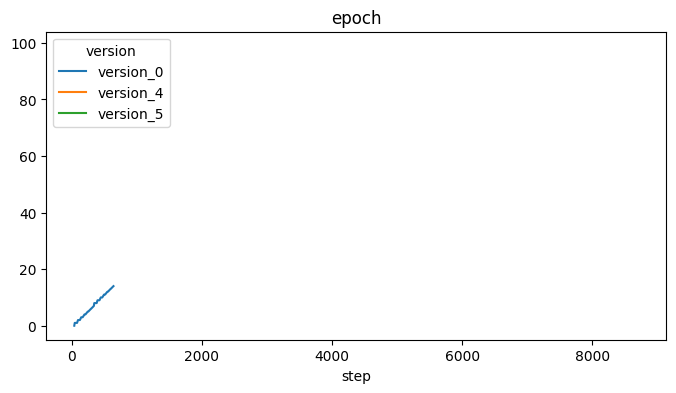

version
version_0    14.0
version_4    14.0
version_5    99.0
dtype: float64


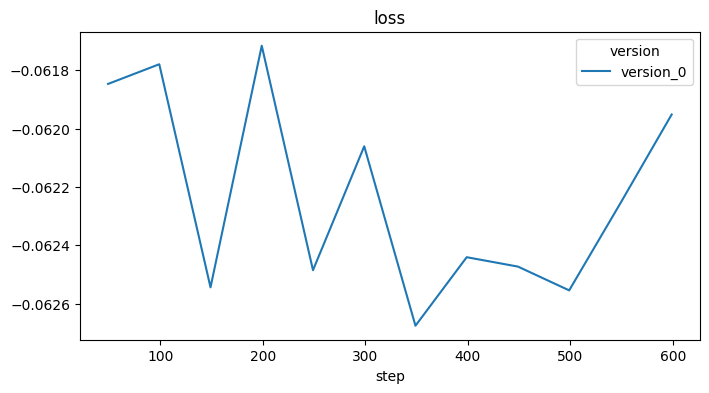

version
version_0   -0.061716
dtype: float64


In [105]:
import matplotlib.pyplot as plt

for tag in ['epoch', 'loss']:
    df = df_tb[lambda x: x['tag'] == tag].set_index(['step', 'version'])['value'].unstack()
    df.plot(figsize=(8, 4), title=tag)
    plt.show()
    print(df.max())

### Predict

In [106]:
from ptls.data_load.utils import collate_feature_dict
from ptls.frames.inference_module import InferenceModule

In [107]:
inference_dl = torch.utils.data.DataLoader(
    dataset=dataset_test,
    collate_fn=collate_feature_dict,
    shuffle=False,
    batch_size=1000,
    num_workers=4,
)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [108]:
inf_module = InferenceModule(
    torch.nn.Sequential(
        sup_module,
        torch.nn.Softmax(dim=-1),
    ),
    model_out_name='prob',
)

In [109]:
df_predict = trainer.predict(inf_module, inference_dl)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 87it [00:00, ?it/s]

In [110]:
import pandas as pd
df_predict = pd.concat(df_predict, axis=0)

In [111]:
df_predict.head()

,from,abuser,prob
0,0x00000000005dbcb0d0513fcda746382fe8a53468,0,0.001
1,0x000000000a38444e0a6e37d3b630d7e855a7cb13,0,0.001
2,0x000000000ecef000e9d22b7e0eb78ef2a8e698d5,0,0.001
3,0x0001cf2b6528d6ebab8a8869fb8786c1398c5015,0,0.001
4,0x000a0b24b1476f647a2a2fa4474f9ed32c685a8e,0,0.001


In [112]:
df_predict[df_predict['prob']>0.02].head(10)

,from,abuser,prob
0,0xf73f7d35696f5f7a8821cdcf3e88c13d1cfae418,0,0.03125
1,0xf747af214c702b542e0c18d89ba26930282885b2,1,0.03125
2,0xf7619ac4492f216938b05145c4c0bd45d818ae6c,1,0.03125
3,0xf775a9a0ad44807bc15936df0ee68902af1a0eee,0,0.03125
4,0xf7c8f14869a3a4efdff867f4a308a9daaf096a30,1,0.03125
5,0xf7db0aaad6d08ad80a6b2d292c031016b7213e2b,0,0.03125
6,0xf814c05dd308e04145f301dfb96ff9faca72e29a,0,0.03125
7,0xf823dd8c0161c8454978f369fe711127e4f3164e,1,0.03125
8,0xf83f70e148bc6ff29bb627f97eb691f30268c7e3,0,0.03125
9,0xf84adc33c0c7c918b0ceaafb321c64ea0efef308,0,0.03125


In [113]:
y_pred = df_predict['prob'].values
y_pred

array([0.001  , 0.001  , 0.001  , ..., 0.03125, 0.03125, 0.03125],
      dtype=float32)

In [114]:
y_true = df_predict['abuser'].values
y_true

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

## Inference

In [60]:
train_dl

In [63]:
sup_data.test_dataloader()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [66]:
dataset_test

In [65]:
# embedding inference

from ptls.data_load.datasets import inference_data_loader

#train_dl = inference_data_loader(train, num_workers=0, batch_size=256)
train_dl = sup_data.test_dataloader()
train_embeds = torch.vstack(trainer.predict(sup_module, train_dl))

test_dl = inference_data_loader(test, num_workers=0, batch_size=256)
test_embeds = torch.vstack(trainer.predict(sup_module, test_dl))

train_embeds.shape, test_embeds.shape

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 87it [00:00, ?it/s]

TypeError: ignored

In [ ]:
# join target and embeddings

df_target = pd.read_csv(os.path.join(data_path, 'train_target.csv'))
df_target = df_target.set_index('client_id')
df_target.rename(columns={"bins": "target"}, inplace=True)

train_df = pd.DataFrame(data=train_embeds, columns=[f'embed_{i}' for i in range(train_embeds.shape[1])])
train_df['client_id'] = [x['client_id'] for x in train]
train_df = train_df.merge(df_target, how='left', on='client_id')

test_df = pd.DataFrame(data=test_embeds, columns=[f'embed_{i}' for i in range(test_embeds.shape[1])])
test_df['client_id'] = [x['client_id'] for x in test]
test_df = test_df.merge(df_target, how='left', on='client_id')

print(train_df.shape, test_df.shape)

(24000, 258) (6000, 258)


Obtained embeddings can be used as features for model training

For example:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

embed_columns = [x for x in train_df.columns if x.startswith('embed')]
x_train, y_train = train_df[embed_columns], train_df['target']
x_test, y_test = test_df[embed_columns], test_df['target']

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.5756666666666667